the Wisconsin Breast Cancer dataset (cancer,
for short), which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),

and the task is to learn to predict whether a tumor is malignant based on the measurements
of the tissue.

In [1]:
import numpy as np #using numpy for linear algebra
import pandas as pd #using pandas for data processing, CSV I/O 

#Using matplotlib for images - keeps the plots in one place. Calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # subplots

import seaborn as sns
import scipy as sp
import warnings 
import os
warnings.simplefilter(action='ignore', category=Warning)
import datetime

## Mengimport Data

In [2]:
# lokasi file ada di D:\deddysuharto\PythonMasterclass\Load_breast_cancer.csv
# perhatikan garis miringnya miring ke kanan
# hanya dengan funsgi .. saja tanpa fungsi yang panjang

filelocation = '../PythonMasterclass/Load_breast_cancer.csv'
cancer = pd.read_csv (filelocation)

In [3]:
cancer.head() #displaying the header of the dataset
cancer.describe() #displaying the description of the dataset in the rows

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Explore Data

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cancer.shape

(569, 33)

In [6]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Unnamed data harus dihapus

In [8]:
cancer.drop('Unnamed: 32', axis = 1, inplace = True)

In [9]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
cancer.shape

(569, 32)

## Visualisasi DATA

Kita ingin mengetahui berapa kanker jinak, berapa kanker ganas

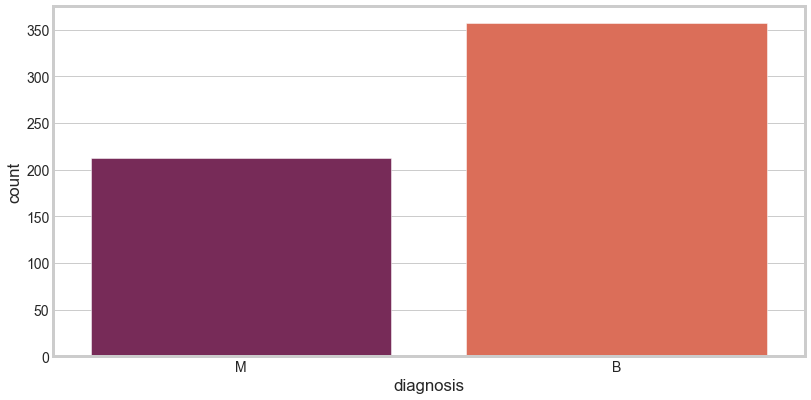

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="diagnosis", data=cancer, palette='rocket');


In [12]:
pd.value_counts(cancer['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

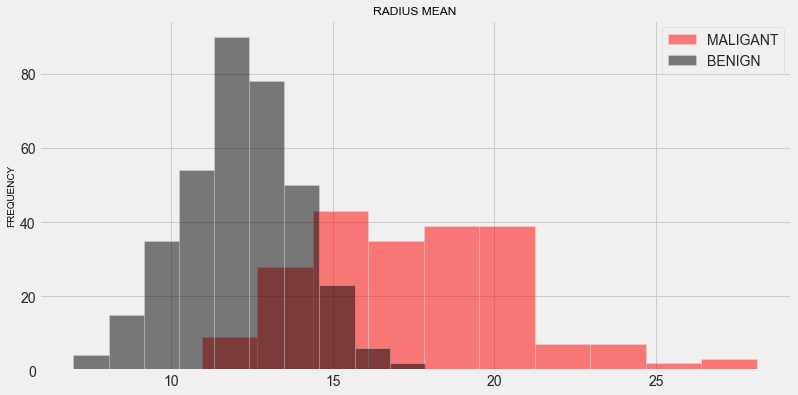

In [27]:
#Sekarang kita akan mendefinisakan data, 
# Kita akan mem visualisasi kasus kanker jinak dan kanker ganas dengan kombinasi feature-feature : 
# 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
      # 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
      # 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
      # 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
      # 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
      # 'fractal_dimension_se', 'radius_worst', 'texture_worst',
      # 'perimeter_worst', 'area_worst', 'smoothness_worst',
      # 'compactness_worst', 'concavity_worst', 'concave points_worst',
      # 'symmetry_worst', 'fractal_dimension_worst'

#Radius Mean
plt.hist(cancer["radius_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["radius_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("RADIUS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Nilai rata-rata Radius bisa digunakan sebagai klasifikasi kanker, 
karena kanker ganas terlihat jelas (berwarna merah) 

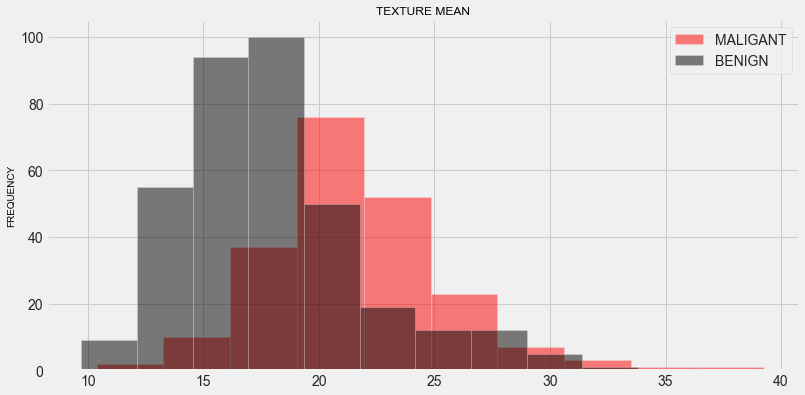

In [14]:
#Texture Mean
plt.hist(cancer["texture_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["texture_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("TEXTURE MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

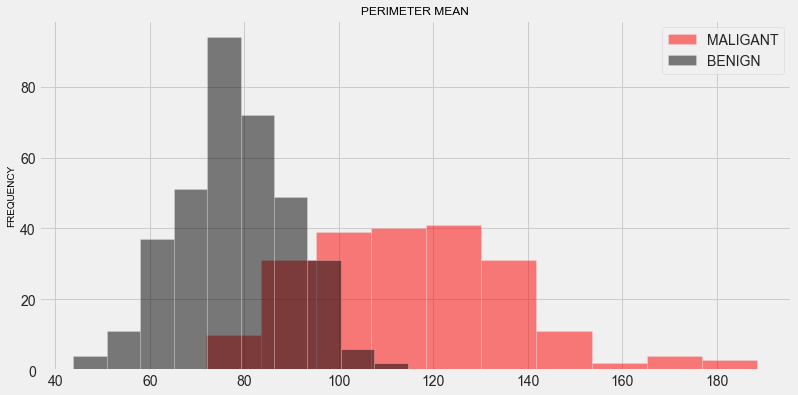

In [15]:
#Perimeter Mean
plt.hist(cancer["perimeter_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["perimeter_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("PERIMETER MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Perimeter juga bisa digunakan untuk peng klasifikasi kanker

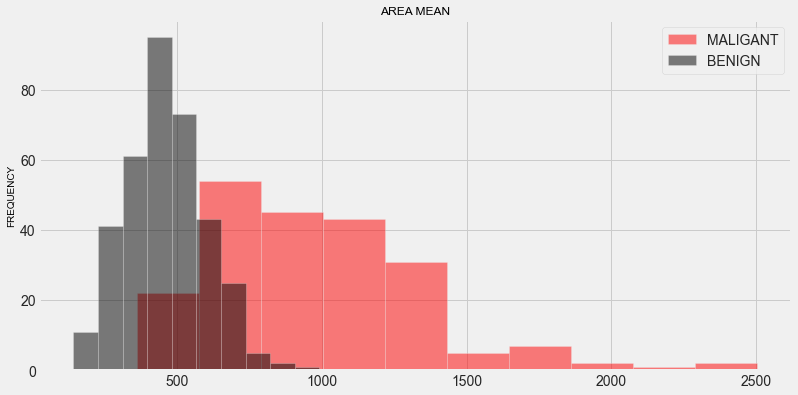

In [16]:
#Area Mean
plt.hist(cancer["area_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["area_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("AREA MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Area juga bisa karena chart kanker ganas nya besar2

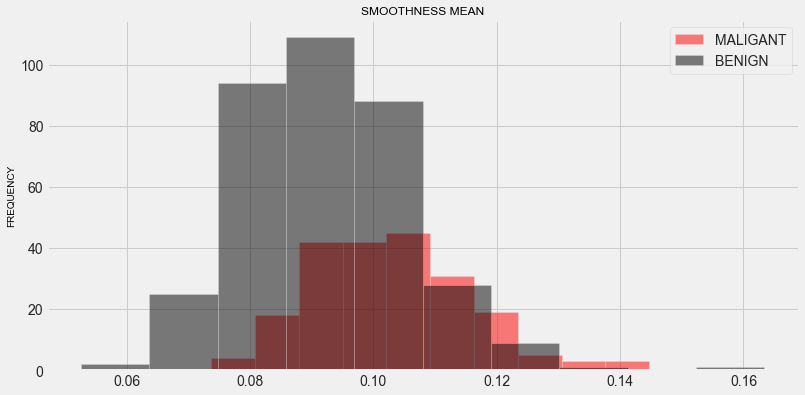

In [17]:
#Smoothness Mean
plt.hist(cancer["smoothness_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["smoothness_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("SMOOTHNESS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

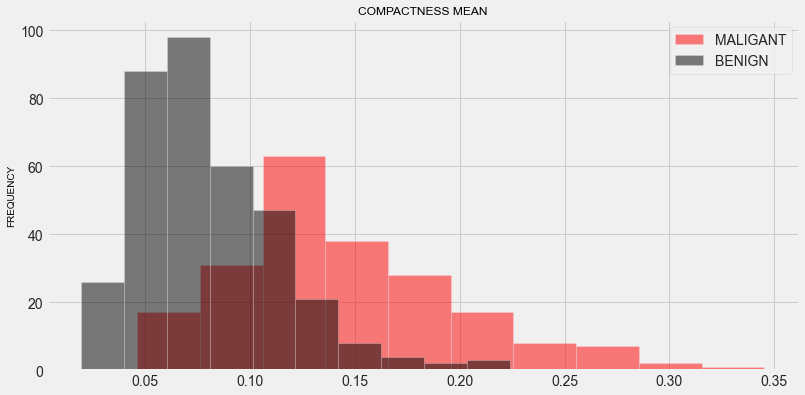

In [18]:
#Compactness Mean
plt.hist(cancer["compactness_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["compactness_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("COMPACTNESS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Compacnes juga bisa

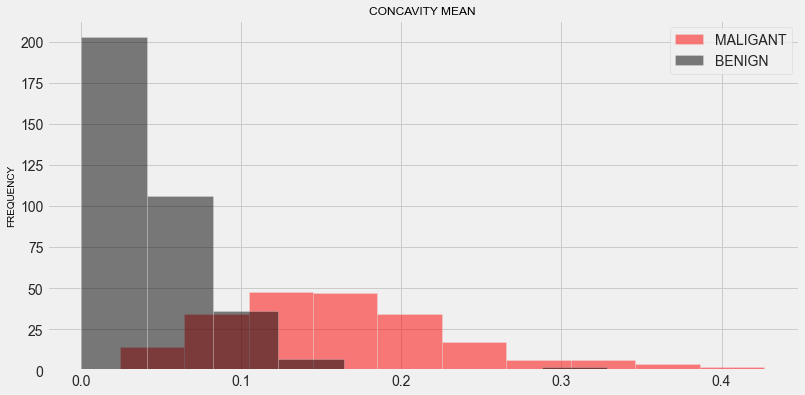

In [19]:
#Concavity Mean
plt.hist(cancer["concavity_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["concavity_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("CONCAVITY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Concavity bisa

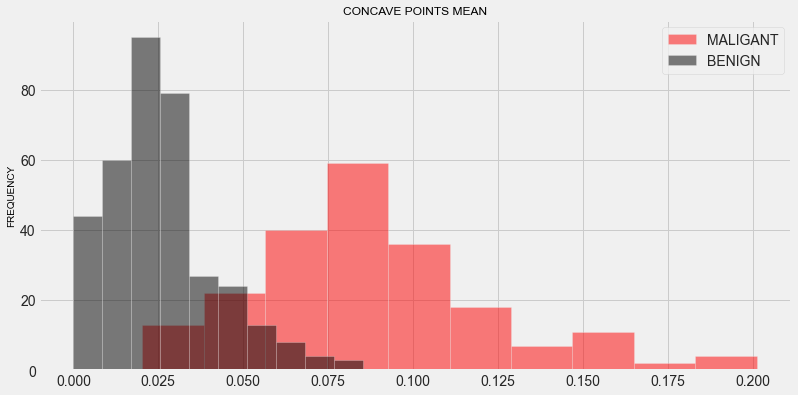

In [20]:
#Concave Points Mean
plt.hist(cancer["concave points_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["concave points_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("CONCAVE POINTS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Concave point juga bisa 

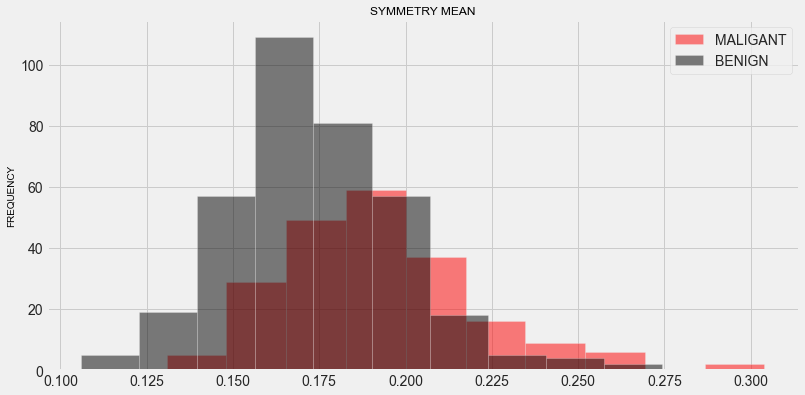

In [21]:
#Symmetry Mean
plt.hist(cancer["symmetry_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["symmetry_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("SYMMETRY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

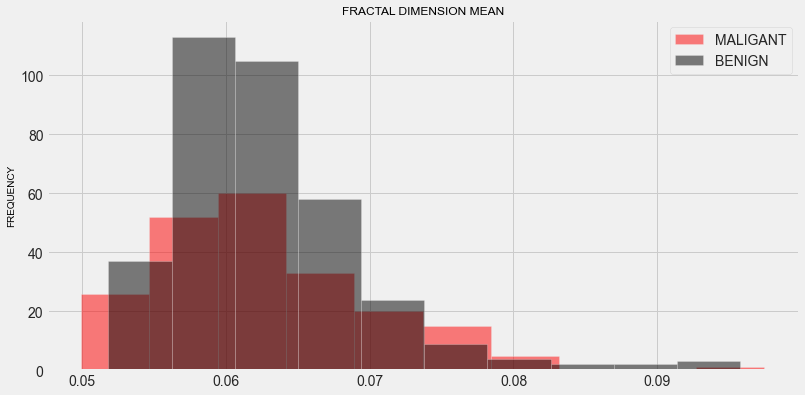

In [22]:
#Fractal Dimension Mean
plt.hist(cancer["fractal_dimension_mean"][cancer["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(cancer["fractal_dimension_mean"][cancer["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("FRACTAL DIMENSION MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

## Observasi

From the images above, since there are clear distinctions among larger values of certain parameters for malignant cancer, some values may be useful in classification of cancer. Values that can be used in classificaiton of cancer are mean values of:
- Cell radius
- Perimeter
- Area
- Compactness
- Concavity
- Concave Points

From the images above, values that may not be great indicators of malignant cancers by not showing a preference in one diagnosis or the other are mean valuess of:

- Texture
- Smoothness
- Symmetry
- Fractual Dimension

In [23]:
cancer.corr

<bound method DataFrame.corr of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

Let's take a look at another way of correlating the data:

In [24]:
#making a correlation table
cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


dari tabel diatas, kita dapat melihat bahwa yg memiliki 
korelasi yang mendekati 1 (100%) adalah :

radius, area, dan perimeter (90%)

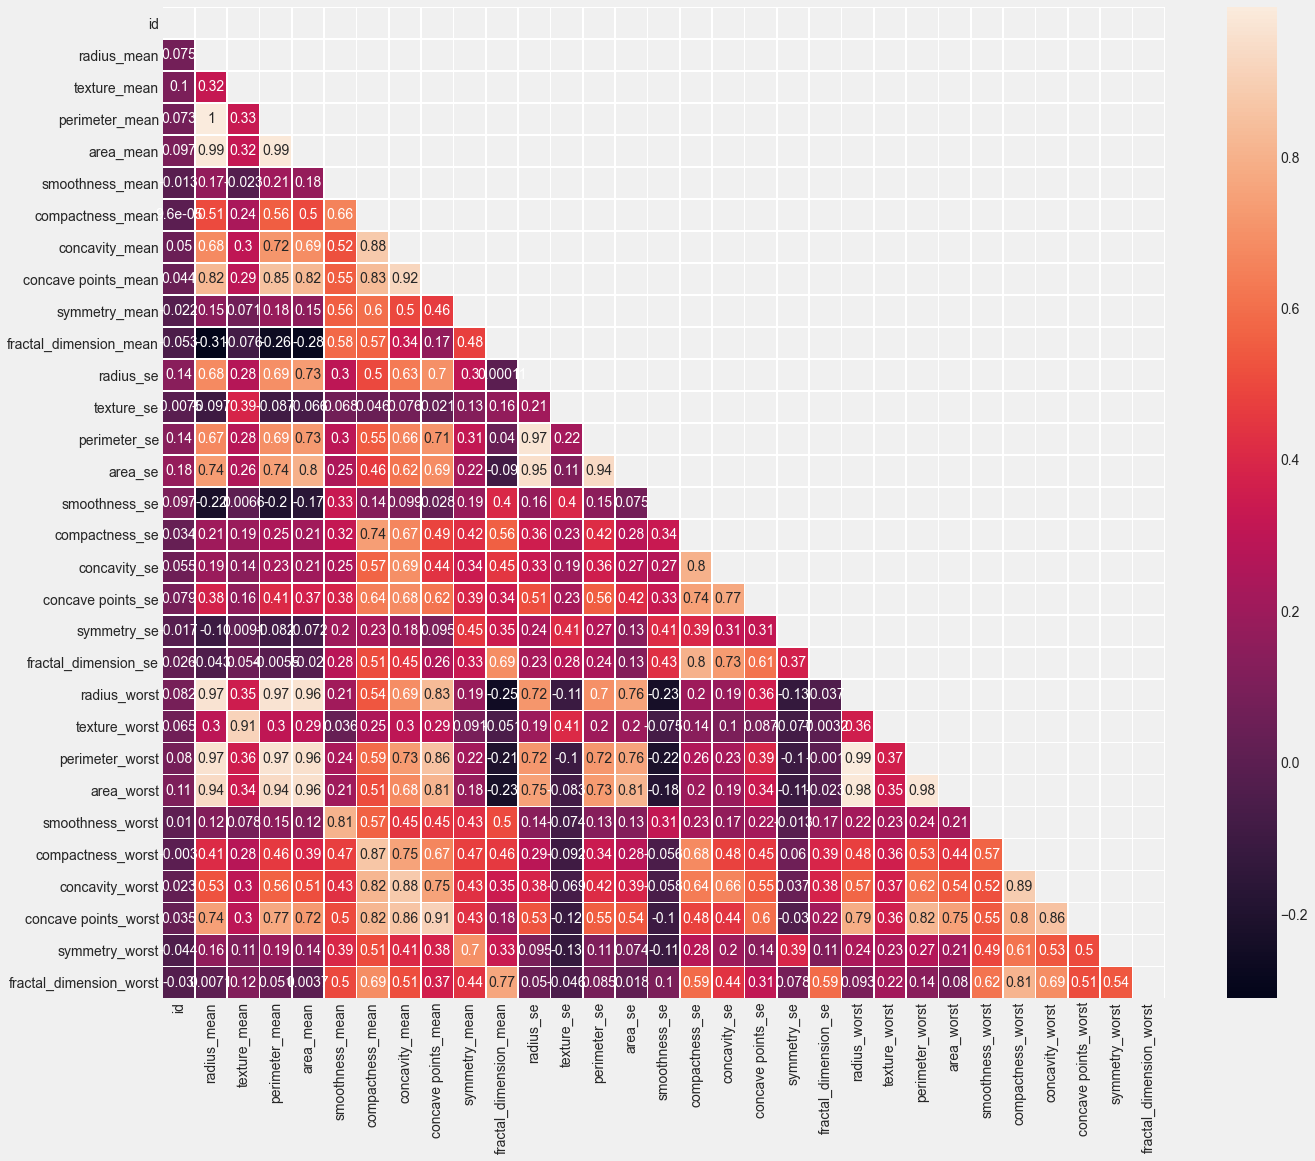

In [25]:
#we can better visualize the correlation in color with. The lighter the color, the greater the correlation value.
plt.figure(figsize=(20, 17))
matrix = np.triu(cancer.corr())
sns.heatmap(cancer.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

dari chart diatas, kita lihat warna yang paling terang (yg mendekati 1) 
yang memiliki korelasi (hubungan) yang baik adalah :

radius, area, perimeter,(90%) 

juga compactness, concavity dan concave (80%)

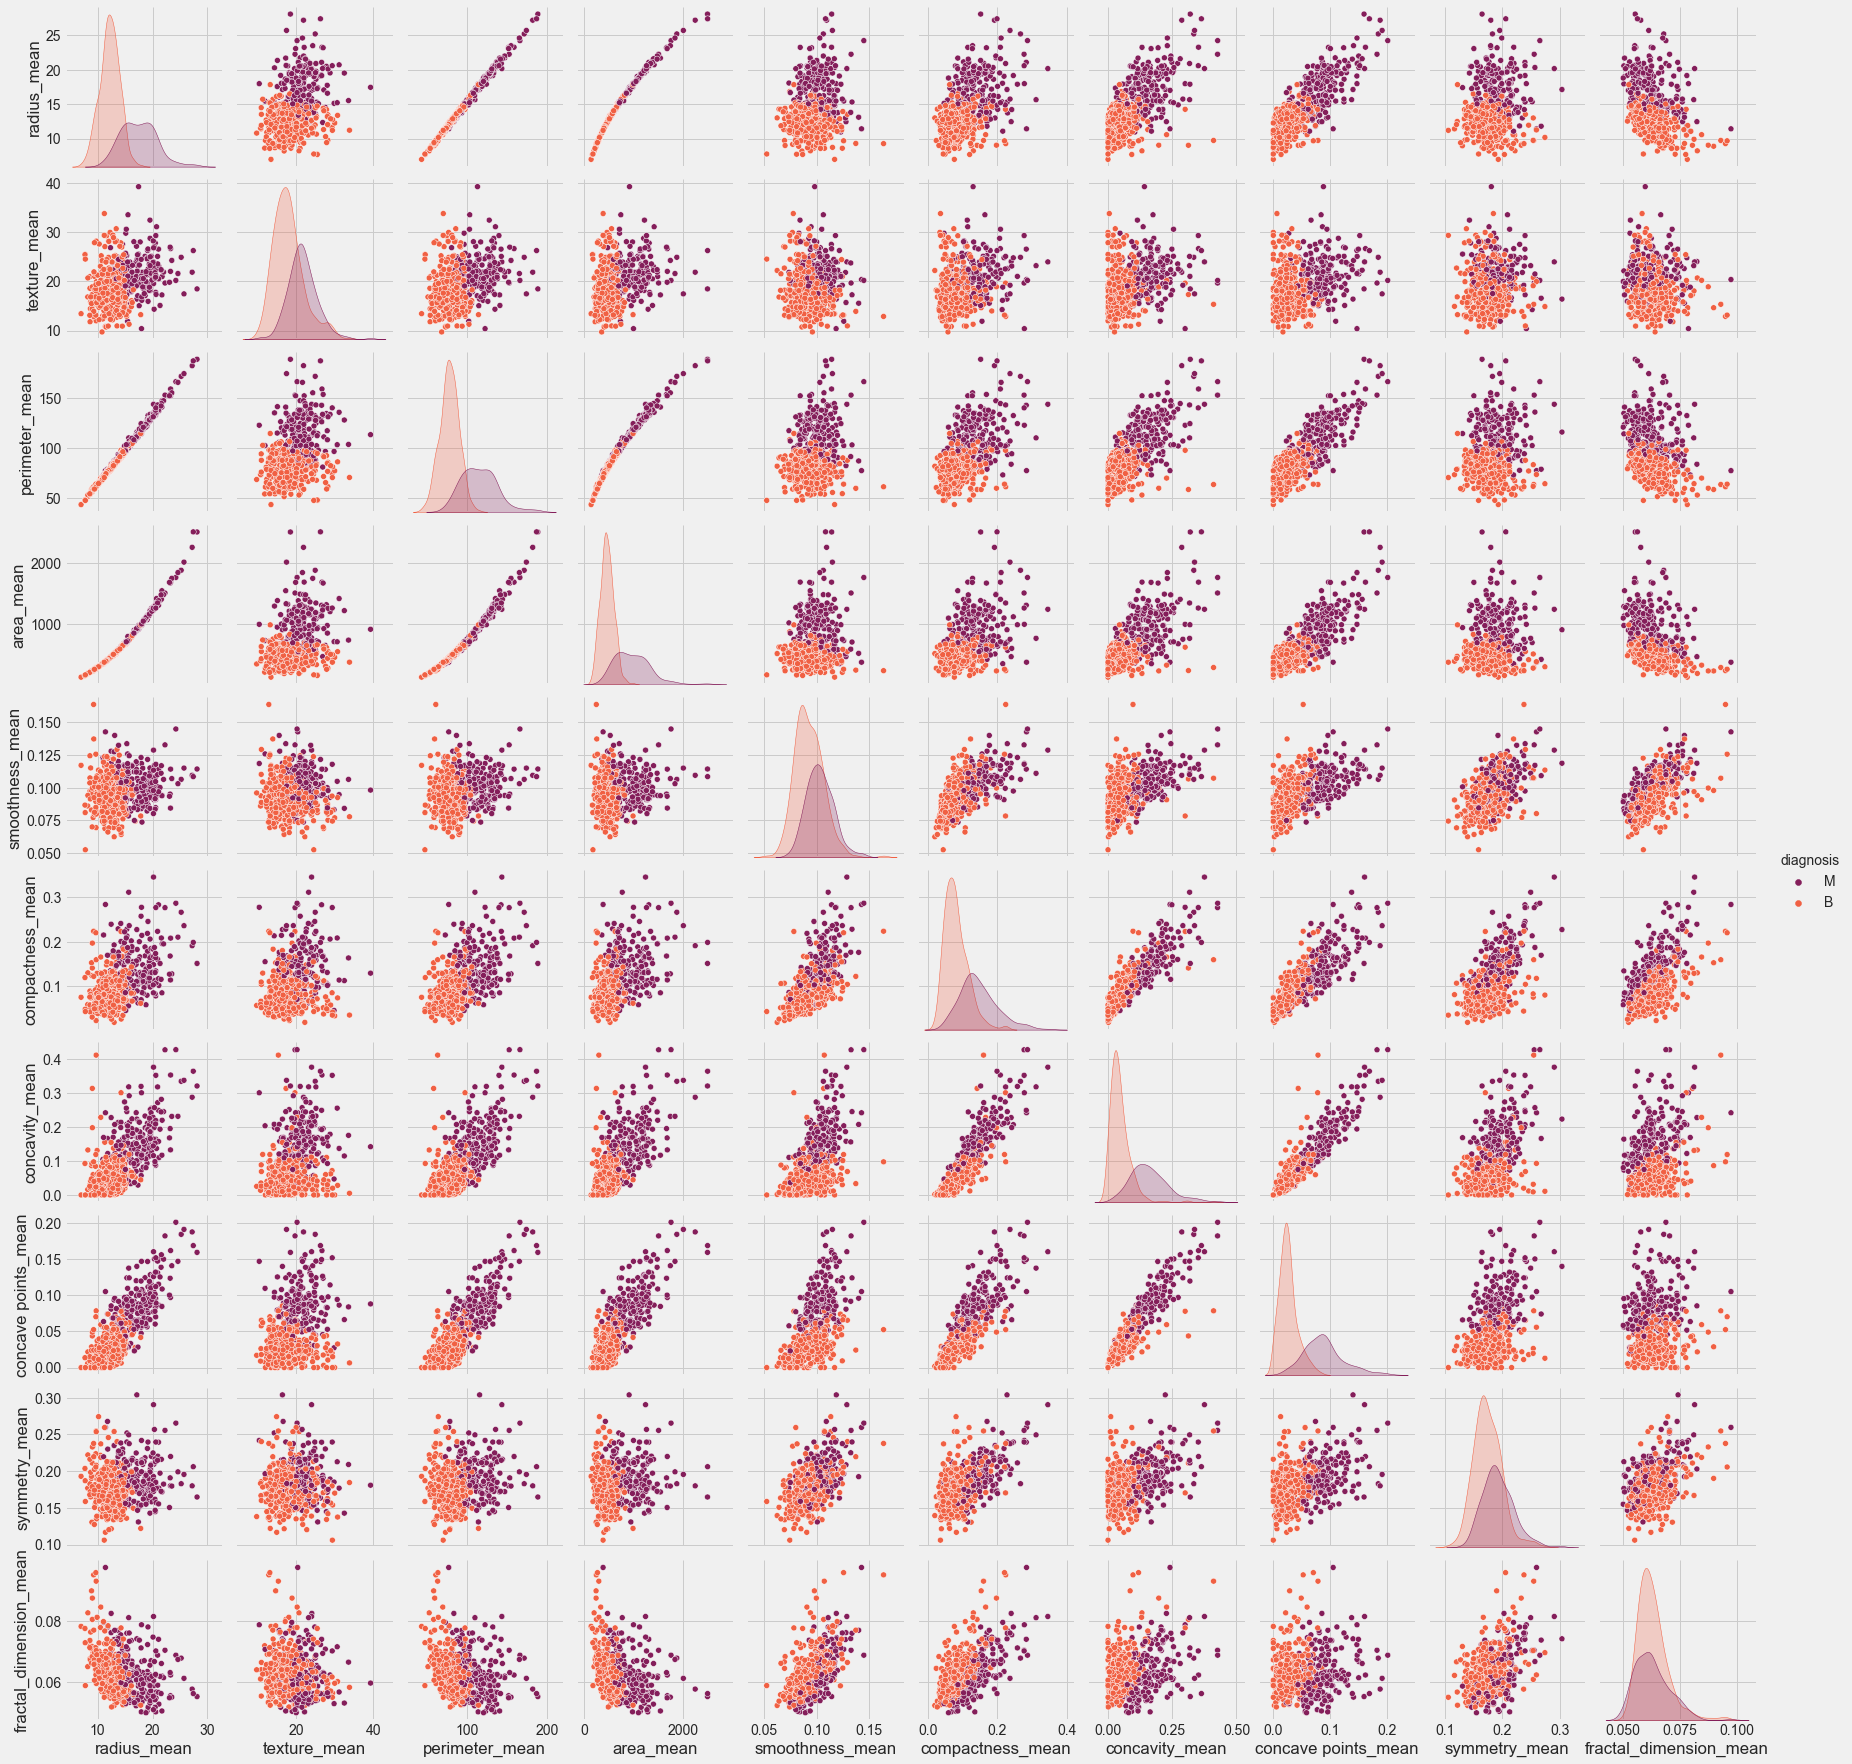

In [26]:
#here's another set of correlation plots. We are plotting the diagnosis (maroon = malignant; orange = benign)
mean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(cancer[mean_col],hue = 'diagnosis', palette='rocket')

## MEMBUAT DATA SET TEST DAN TRAIN 

data-datanya tidak beraturan , kita akan membaginya 70 % (training data) 30% (test data) 


In [47]:
# ini hal paling penting, menentukan x dan y dari data cancer
# untuk mendapatkan feature di sumbu x

x = cancer.drop(columns = 'diagnosis')

In [38]:
# untuk mendapat nilai prediksi di sumbu y 

y = cancer['diagnosis']

In [39]:
#train_test_splitting of the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 

#defining the test data as 30% of the data

In [40]:
#Check to see if it's a 70:30 split

In [41]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

398
171
398
171


In [42]:
# jumlah baris 569 , 70 % nya adalah 398
# 569 x 30% = 170,7 atau 171

## MEMASUKKAN DATA-DATA KE MODEL STATISTIK

### 1. LOGISTIC REGRESIONS

In [43]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred=lr_model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score:", lr_model.score(x_train, y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Logistic Regression Model is: ", accuracy_score(y_test, y_pred)*100 , "%")
lr_model_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

[[108   0]
 [ 63   0]]
Training Score: 62.562814070351756
The accuracy of the Logistic Regression Model is:  63.1578947368421 %


In [45]:
#Checking out the actual vs predicted values with the 
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,M,B
457,B,B
439,B,B
298,B,B
37,B,B
...,...,...
7,M,B
408,M,B
523,B,B
361,B,B


### 2. DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [48]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Decision Tree Model is: ", accuracy_score(y_test, y_pred)*100, "%")
dtree_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

[[101   7]
 [  4  59]]
Training Score:  99.74874371859298
The accuracy of the Decision Tree Model is:  93.56725146198829 %


### 3. RANDOM FOREST CLASSIFIER

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Random Forest Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
rfc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.97      0.97      0.97       108
           M       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   3]
 [  3  60]]
Training Score:  99.74874371859298
The accuracy of the Random Forest Classifier Model is:  96.49122807017544 %


### 4. K NEAREST NEIGHBORS CLASSIFIER (KNN)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [52]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the K Neareset Neighbors Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
knn_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.69      0.95      0.80       108
           M       0.77      0.27      0.40        63

    accuracy                           0.70       171
   macro avg       0.73      0.61      0.60       171
weighted avg       0.72      0.70      0.65       171

[[103   5]
 [ 46  17]]
Training Score:  80.40201005025126
The accuracy of the K Neareset Neighbors Classifier Model is:  70.17543859649122 %


### 5. SUPPORT VECTOR CLASSIFICATION (SVC)

In [53]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train, y_train)

SVC()

In [54]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",svc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Support Vector Classification Model is: ", accuracy_score(y_test, y_pred)*100, "%")
svc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

[[108   0]
 [ 63   0]]
Training Score:  62.562814070351756
The accuracy of the Support Vector Classification Model is:  63.1578947368421 %


### 6. ADA BOOST CLASSIFIER

In [55]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(base_estimator = None)

adb.fit(x_train, y_train)

AdaBoostClassifier()

In [56]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",adb.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Ada Boost Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
adb_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[106   2]
 [  3  60]]
Training Score:  100.0
The accuracy of the Ada Boost Classifier Model is:  97.07602339181285 %


### 7. GRADIENT BOOST CLASSIFIER

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [58]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Gradient Boost Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
gbc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[106   2]
 [  3  60]]
Training Score:  100.0
The accuracy of the Gradient Boost Classifier Model is:  97.07602339181285 %


### 8. EXTREME GRADIENT BOOSTING (XGB) CLASSIFIER

In [60]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective ='reg:linear', colsample_bytree= 0.3, learning_rate=0.1,
                  max_depth=5, alpha=10, n_estimators=10)

xgb.fit(x_train, y_train)

[23:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1,
              objective='reg:linear', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",xgb.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Extreme Gradient Boosting Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
xgb_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.94      0.94      0.94       108
           M       0.90      0.89      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

[[102   6]
 [  7  56]]
Training Score:  97.98994974874373
The accuracy of the Extreme Gradient Boosting Classifier Model is:  92.39766081871345 %


### 9. NAIVE BAYES

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [63]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Naive Bayes Model is: ", accuracy_score(y_test, y_pred)*100, "%")
gnb_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.64      0.99      0.78       108
           M       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171

[[107   1]
 [ 61   2]]
Training Score:  62.06030150753769
The accuracy of the Naive Bayes Model is:  63.74269005847953 %


### 10. DEEP LEARNING MODEL

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [66]:
# Importing data
data = pd.read_csv('../PythonMasterclass/Load_breast_cancer.csv')
del data['Unnamed: 32']

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [67]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [70]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = Sequential()

In [71]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))

In [72]:
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))


In [73]:
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))

In [74]:
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [75]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [76]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
#Optimizer is chosen as adam for gradient descent and Binary_crossentropy is the loss function used.

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=75, epochs=75)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions.

Epoch 1/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.7060
Epoch 2/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.7940
Epoch 3/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.8693
Epoch 4/75
6/6 [==============================] - 0s 997us/step - loss: 0.6807 - accuracy: 0.9045
Epoch 5/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.9322
Epoch 6/75
6/6 [==============================] - 0s 998us/step - loss: 0.6563 - accuracy: 0.9497
Epoch 7/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6348 - accuracy: 0.9548
Epoch 8/75
6/6 [==============================] - 0s 997us/step - loss: 0.6095 - accuracy: 0.9548
Epoch 9/75
6/6 [==============================] - 0s 997us/step - loss: 0.5734 - accuracy: 0.9598
Epoch 10/75
6/6 [==============================] - 0s 998us/step - loss: 0.5366 - accuracy: 0.9623
Epoch 11/75
6/6 [============

In [78]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
score = f1_score(y_test, y_pred, average='binary')
print("Training Score: ",score*100)
#Printing the accuracy of the model
print("The accuracy of the Deep Learning Model is: ", accuracy_score(y_test, y_pred)*100, "%")

dl_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  2  61]]
Training Score:  96.82539682539682
The accuracy of the Deep Learning Model is:  97.6608187134503 %


In [79]:
print("Logistic Regression: ",lr_model_results)
print("Decision Tree: ",dtree_results)
print("Random Forest: ",rfc_results)
print("K Nearest Neighbors: ",knn_results)
print("Support Vector: ",svc_results)
print("Ada Boost: ",adb_results)
print("Gradient Boost: ",gbc_results)
print("Extreme Gradient Boost: ",xgb_results)
print("Naive Bayes: ",gnb_results)
print("Deep Learning: ",dl_results)

Logistic Regression:  63.1578947368421
Decision Tree:  93.56725146198829
Random Forest:  96.49122807017544
K Nearest Neighbors:  70.17543859649122
Support Vector:  63.1578947368421
Ada Boost:  97.07602339181285
Gradient Boost:  97.07602339181285
Extreme Gradient Boost:  92.39766081871345
Naive Bayes:  63.74269005847953
Deep Learning:  97.6608187134503
